# How to Structure from Motion

## Authors: Muneeb Aadil, Sibt Ul Hussain

In [48]:
#loading needed libraries 
import utils as ut 
import SfM as sfmnp

import matplotlib.pyplot as plt 
%matplotlib notebook 
from mpl_toolkits.mplot3d import Axes3D

import cv2 
import numpy as np 

#auto-reloading external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Chapter 1. Prerequisites

## 1.1. Transformations

## 1.2. Camera Models 

## 1.3 RANSAC

# Chapter 2. Epipolar Geometry

## 2.0. Reading a pair of images, and comparing SIFT matches

In [49]:
#Reading two images for reference
img1 = cv2.imread('../data/fountain-P11/images/0004.jpg')
img2 = cv2.imread('../data/fountain-P11/images/0006.jpg')

#Converting from BGR to RGB format
img1 = img1[:,:,::-1]
img2 = img2[:,:,::-1]

#NOTE: you can adjust appropriate figure size according to the size of your screen
fig,ax=plt.subplots(ncols=2,figsize=(9,4)) 
ax[0].imshow(img1)
ax[1].imshow(img2)

<IPython.core.display.Javascript object>

In [50]:
#Getting SIFT/SURF features for image matching (this might take a while)
kp1,desc1,kp2,desc2,matches=ut.GetImageMatchesAKAZE(img1,img2)

#Aligning two keypoint vectors
img1pts,img2pts,img1idx,img2idx=ut.GetAlignedMatchesAKAZE(kp1,kp2,matches)

## 2.2. Fundamental Matrix Computation

### 2.2.1. Eight Point Algorithm

In [51]:
F, maskgt= cv2.findFundamentalMat(img1pts_,img2pts_, method=cv2.FM_8POINT)

print(F)

[[-3.03378157e-08  1.70927604e-06 -1.90920387e-03]
 [-1.59919004e-06  3.14472273e-07 -1.79956458e-02]
 [ 1.48855045e-03  1.68191414e-02  1.00000000e+00]]


### 2.2.3. with RANSAC (Random Sample Consensus)

In [58]:
F, mask = cv2.findFundamentalMat(img1pts,img2pts,method=cv2.FM_RANSAC,ransacReprojThreshold=0.1)
#mask = maskgt.astype(bool).flatten()
print((img1pts))
print(F)
print(mask)
print(len(mask))

[[1694.67895508 1290.99938965]
 [1333.20922852 1608.0324707 ]
 [1550.07214355 1242.47595215]
 ...
 [2876.34301758  286.78567505]
 [2846.15722656  186.53652954]
 [2364.79467773 1350.78076172]]
[[ 1.95631597e-07  2.58473439e-06 -2.06111044e-03]
 [-2.49949088e-06  8.52961038e-09  3.31284603e-03]
 [ 1.26658222e-03 -3.84800319e-03  1.00000000e+00]]
[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [0]]
3158


## 2.2. Epipolar Lines Computation

In [66]:
lines2=cv2.computeCorrespondEpilines(img1pts,1,F).reshape(-1,3)
lines1=cv2.computeCorrespondEpilines(img2pts,2,F).reshape(-1,3)


print(lines1)
print(lines2)

[[-7.99168222e-01  6.01107439e-01  6.42200976e+02]
 [-8.98886450e-01  4.38181641e-01  8.88151770e+02]
 [-8.79136531e-01  4.76569996e-01  8.35174475e+02]
 ...
 [ 2.56018110e-01  9.66671985e-01 -1.01363058e+03]
 [ 3.92916351e-01  9.19574217e-01 -1.16257885e+03]
 [-9.92720761e-02  9.95060327e-01 -5.61665442e+02]]
[[ 8.69751364e-01 -4.93490187e-01 -9.85554974e+02]
 [ 9.99996988e-01 -2.45427363e-03 -1.48515226e+03]
 [ 9.35086943e-01 -3.54418409e-01 -1.16934365e+03]
 ...
 [-1.91808063e-01 -9.81432457e-01  8.96685863e+02]
 [-2.59788769e-01 -9.65665468e-01  9.87927464e+02]
 [ 5.90597120e-01 -8.06966568e-01 -3.75214114e+02]]


## 2.3. Epipoles Computation

In [ ]:
#to do later..


## 2.4. Visualizations I: Epipolar Geometry
### 2.4.1. Epipolar Lines

In [75]:


tup = ut.drawlines(img2,img1,lines2,img2pts[mask.astype(bool).flatten()],img1pts[mask.astype(bool).flatten()],drawOnly=10,
                   linesize=10,circlesize=30)
epilines2 = np.concatenate(tup[::-1],axis=1) #reversing the order of left and right images

# Convert the image from BGR to RGB format
epilines2 = cv2.cvtColor(epilines2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9,4))
plt.imshow(epilines2)
plt.show()

'''
tup = ut.drawlines(img1,img2,lines1,img1pts[mask.astype(bool).flatten()],img2pts[mask.astype(bool).flatten()],drawOnly=10,
                   linesize=10,circlesize=30)
epilines1 = np.concatenate(tup,axis=1) 

plt.figure(figsize=(9,4))
plt.imshow(epilines1)
plt.show()
'''

<IPython.core.display.Javascript object>

'\ntup = ut.drawlines(img1,img2,lines1,img1pts[mask.astype(bool).flatten()],img2pts[mask.astype(bool).flatten()],drawOnly=10,\n                   linesize=10,circlesize=30)\nepilines1 = np.concatenate(tup,axis=1) \n\nplt.figure(figsize=(9,4))\nplt.imshow(epilines1)\nplt.show()\n'

### 2.4.2. Epipoles

In [ ]:
# to do later..

## 2.5. Pose Estimation

In [ ]:
K = np.array([[2759.48,0,1520.69],[0,2764.16,1006.81],[0,0,1]])
E = K.T.dot(F.dot(K))

R1,R2,t = sfmnp.ExtractCameraPoses(E)
t = t[:,np.newaxis]

## 2.6. Visualizations II: Camera Poses

<IPython.core.display.Javascript object>


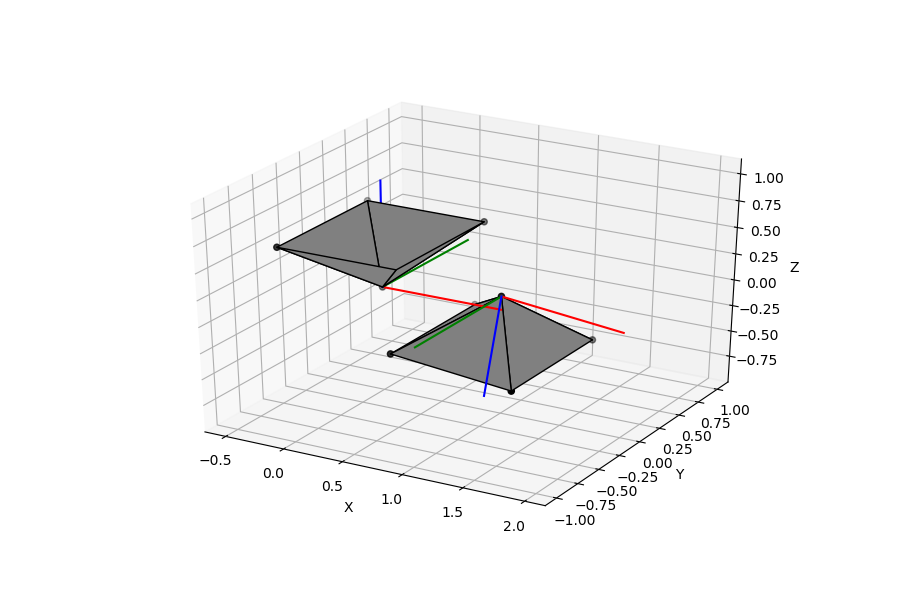

<IPython.core.display.Javascript object>


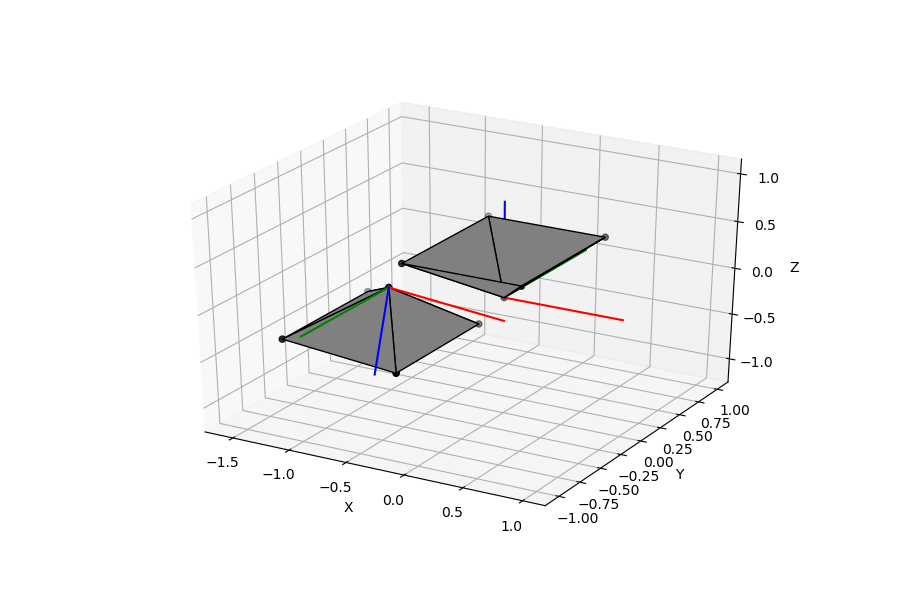

<IPython.core.display.Javascript object>


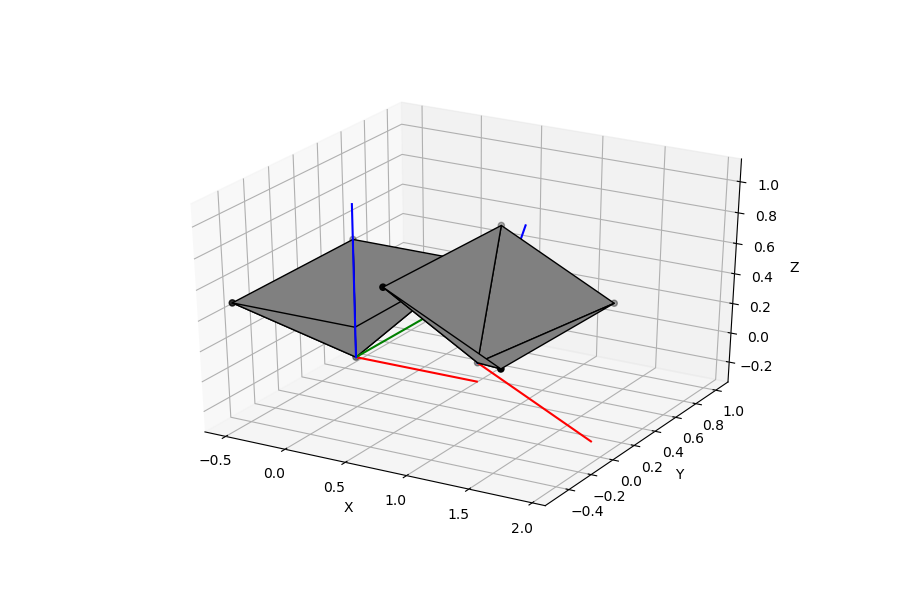

<IPython.core.display.Javascript object>


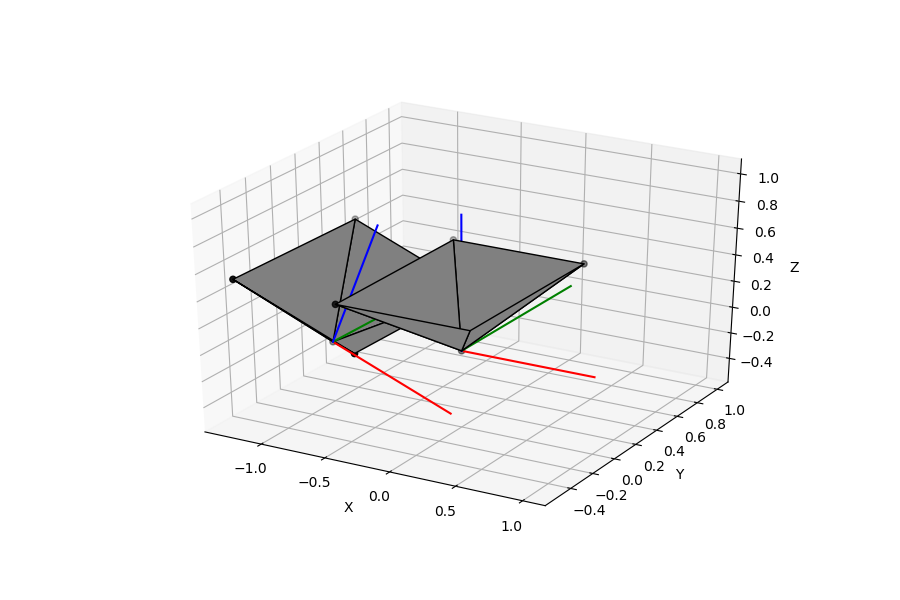

In [ ]:
for R_ in [R1,R2]: 
    for t_ in [t,-t]:
        
        fig = plt.figure(figsize=(9,6))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        ut.PlotCamera(np.eye(3,3),np.zeros((3,)),ax)
        ut.PlotCamera(R_,t_[:,0],ax)

# Chapter 3. 3D Scene Estimations

## 3.1. Triangulation: DLT Method 

In [ ]:
def GetTriangulatedPts(img1pts,img2pts,K,R,t,triangulateFunc): 
    img1ptsHom = cv2.convertPointsToHomogeneous(img1pts)[:,0,:]
    img2ptsHom = cv2.convertPointsToHomogeneous(img2pts)[:,0,:]

    img1ptsNorm = (np.linalg.inv(K).dot(img1ptsHom.T)).T
    img2ptsNorm = (np.linalg.inv(K).dot(img2ptsHom.T)).T

    img1ptsNorm = cv2.convertPointsFromHomogeneous(img1ptsNorm)[:,0,:]
    img2ptsNorm = cv2.convertPointsFromHomogeneous(img2ptsNorm)[:,0,:]
    
    pts4d = triangulateFunc(np.eye(3,4),np.hstack((R,t)),img1ptsNorm.T,img2ptsNorm.T)
    pts3d = cv2.convertPointsFromHomogeneous(pts4d.T)[:,0,:]
    
    return pts3d

In [ ]:
pts3dgt = GetTriangulatedPts(img1pts[mask],img2pts[mask],K,R2,t,cv2.triangulatePoints)
pts3d = GetTriangulatedPts(img1pts[mask],img2pts[mask],K,R2,t,sfmnp.Triangulate)

In [ ]:
print (pts3dgt[:5])

print (pts3d[:5])
np.testing.assert_allclose(pts3d,pts3dgt,rtol=1e-7,atol=1e-3)

[[-0.20538011 -0.15822107 -2.2744921 ]
 [ 0.14205583 -0.18082672 -2.24722573]
 [ 0.05715696 -0.17399485 -2.23255088]
 [-0.82466885 -0.50377816 -2.21187558]
 [ 0.60381689 -0.12101426 -2.46185569]]

[[-0.20538945 -0.15823158 -2.27452636]
 [ 0.14206111 -0.180824   -2.2472177 ]
 [ 0.05715933 -0.17399703 -2.23255718]
 [-0.82531486 -0.50402876 -2.21292638]
 [ 0.60381667 -0.12100653 -2.46181554]]


AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0.001

(mismatch 11.4058956916%)
 x: array([[-0.205389, -0.158232, -2.274526],
       [ 0.142061, -0.180824, -2.247218],
       [ 0.057159, -0.173997, -2.232557],...
 y: array([[-0.20538 , -0.158221, -2.274492],
       [ 0.142056, -0.180827, -2.247226],
       [ 0.057157, -0.173995, -2.232551],...

In [ ]:
configSet = [None,None,None,None]
configSet[0] = (R1,t,GetTriangulatedPts(img1pts[mask],img2pts[mask],K,R1,t,cv2.triangulatePoints))
configSet[1] = (R1,-t,GetTriangulatedPts(img1pts[mask],img2pts[mask],K,R1,-t,cv2.triangulatePoints))
configSet[2] = (R2,t,GetTriangulatedPts(img1pts[mask],img2pts[mask],K,R2,t,cv2.triangulatePoints))
configSet[3] = (R2,-t,GetTriangulatedPts(img1pts[mask],img2pts[mask],K,R2,-t,cv2.triangulatePoints))

## 3.2. Visualizing the triangulated points of configurations

<IPython.core.display.Javascript object>


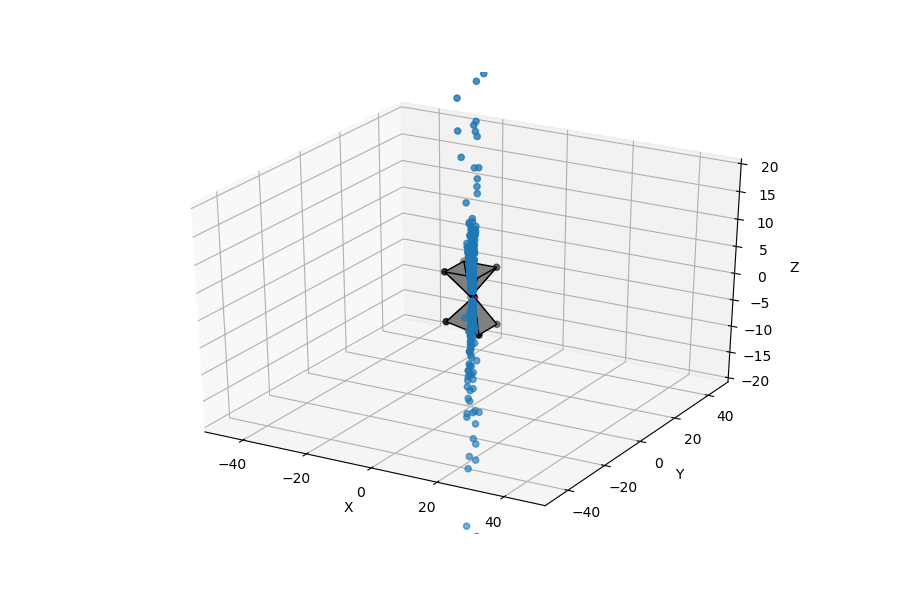

<IPython.core.display.Javascript object>


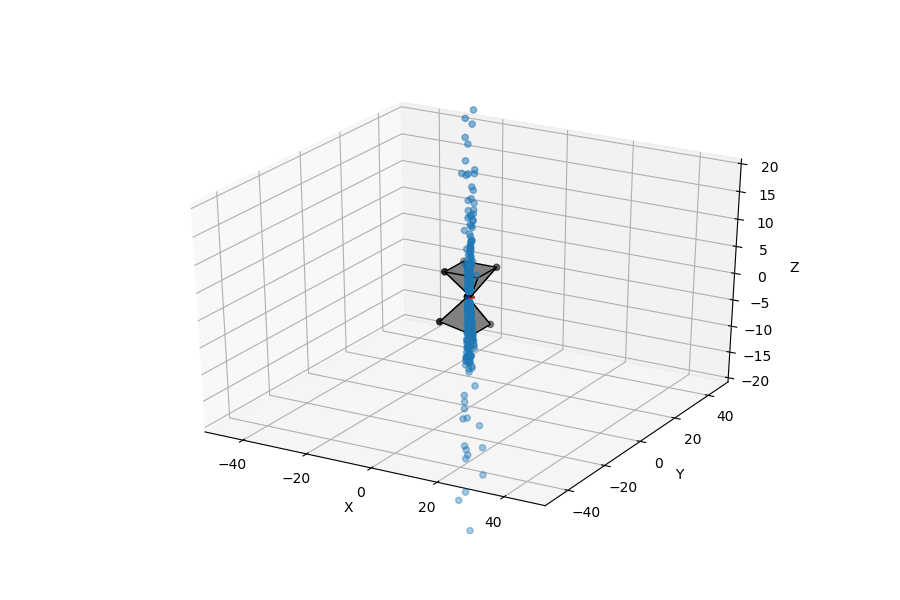

<IPython.core.display.Javascript object>


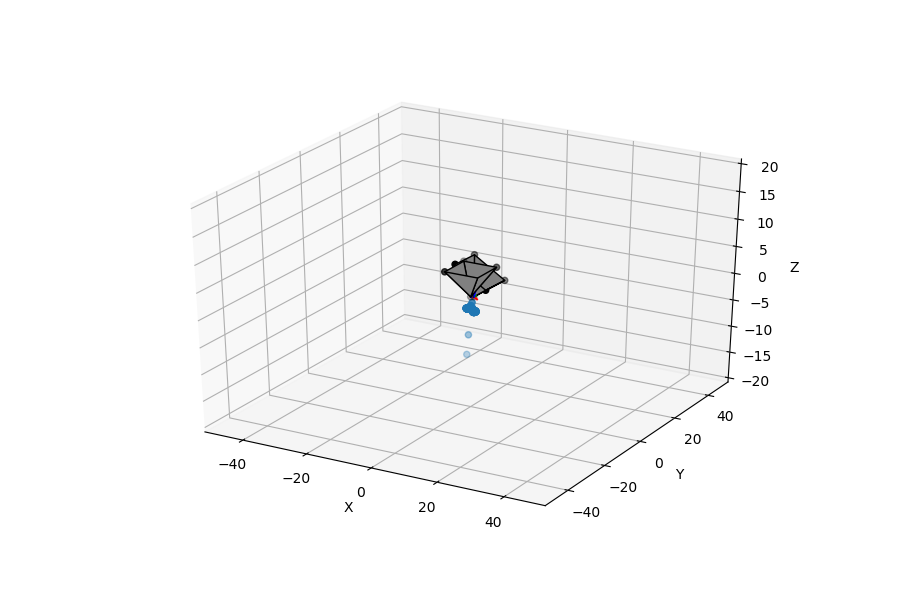

<IPython.core.display.Javascript object>


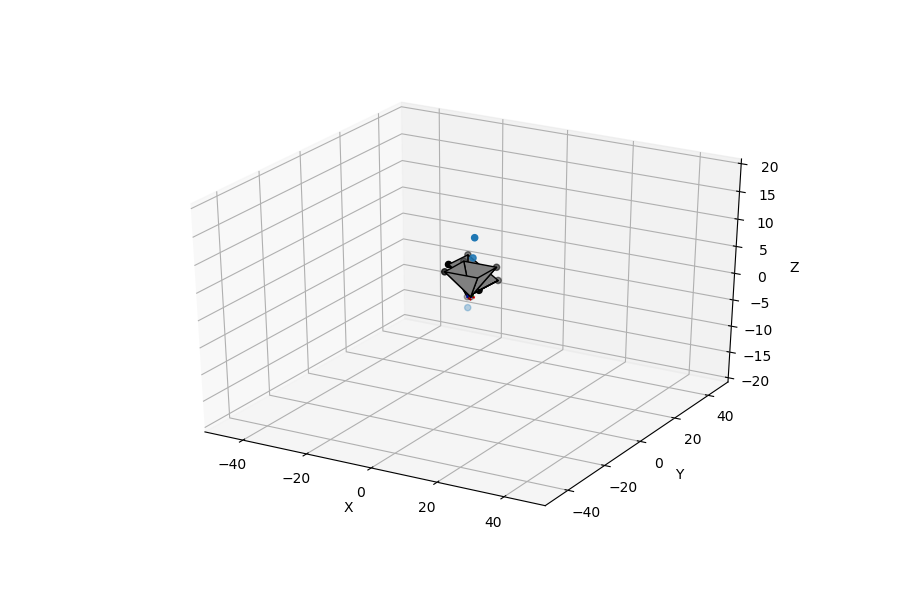

In [ ]:
for cs in configSet: 
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ut.PlotCamera(np.eye(3,3),np.zeros((3,)),ax,scale=5,depth=5)
    ut.PlotCamera(cs[0],cs[1][:,0],ax,scale=5,depth=5)

    pts3d = cs[-1]
    ax.scatter3D(pts3d[:,0],pts3d[:,1],pts3d[:,2])

    ax.set_xlim(left=-50,right=50)
    ax.set_ylim(bottom=-50,top=50)
    ax.set_zlim(bottom=-20,top=20)

## 3.3. Camera Pose Disambiguation

In [ ]:
_,Rgt,tgt,mask2=cv2.recoverPose(E,img1pts[mask],img2pts[mask],K)
R,t,count = sfmnp.DisambiguateCameraPose(configSet)

In [ ]:
print (R)

print (Rgt)

print (t)

print (tgt) 

np.testing.assert_allclose(R,Rgt,rtol=1e-7,atol=1e-4)
np.testing.assert_allclose(t,tgt,rtol=1e-7,atol=1e-4)

[[ 0.93207813 -0.0149146  -0.36195015]
 [ 0.00956543  0.99981701 -0.01656621]
 [ 0.36213099  0.0119788   0.93205024]]

[[ 0.93207813 -0.0149146  -0.36195015]
 [ 0.00956543  0.99981701 -0.01656621]
 [ 0.36213099  0.0119788   0.93205024]]

[[0.99291998]
 [0.01423157]
 [0.11792951]]

[[0.99291998]
 [0.01423157]
 [0.11792951]]


## 3.4. Visualizing Point Cloud Output

Since point cloud isn't effectively viewed in matplotlib, we can use an external software `meshlab` for better visualizations. For that, we'd need to transform our 3D points' format into meshlab-compatible format. We understand it can be rather tedious, so the function `pts2ply()` is already implemented for you.

In [ ]:
pts3d = GetTriangulatedPts(img1pts[mask],img2pts[mask],K,R,t,cv2.triangulatePoints)
ut.pts2ply(pts3d,'castle_2view.ply')

Now, please run `out.ply` with `meshlab` like so: `meshlab out.ply`

Output is also displayed below for reference

**NOTE**: Meshlab can be installed using `sudo apt-get install meshlab`

<img src="fountain.png">

# 3. Reprojection Error: Evaluation

## 3.1. Computation

In [ ]:
img1ptsReproj = sfmnp.ComputeReprojections(pts3d,np.eye(3,3),np.zeros((3,1)),K)
img2ptsReproj = sfmnp.ComputeReprojections(pts3d,R,t,K)

In [ ]:
err2 = sfmnp.ComputeReprojectionError(img2pts[mask], img2ptsReproj)
err1 = sfmnp.ComputeReprojectionError(img1pts[mask], img1ptsReproj)

err1, err2 

(8.918662349584308, 9.416287178421662)

## 3.2. Visualizations

<IPython.core.display.Javascript object>


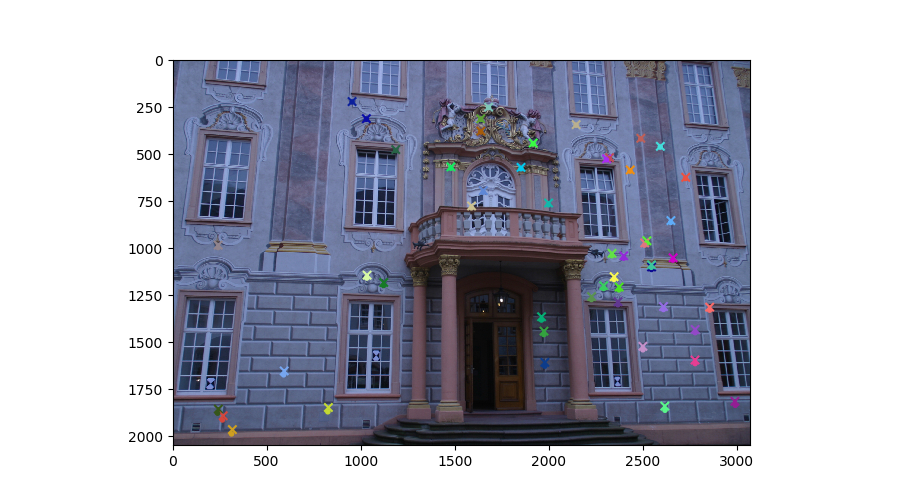

<IPython.core.display.Javascript object>


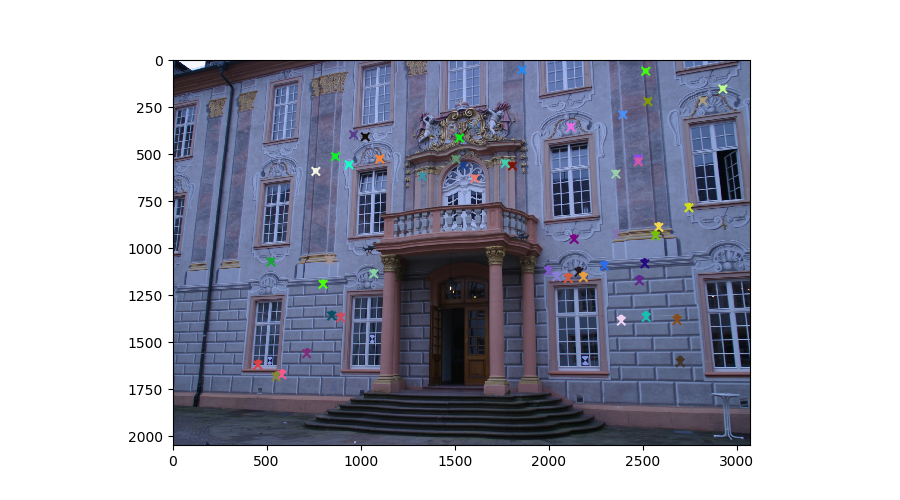

In [ ]:
fig,ax=plt.subplots(figsize=(9,5))
ut.DrawCorrespondences(img1,img1pts[mask],img1ptsReproj,ax)

fig,ax=plt.subplots(figsize=(9,5))
ut.DrawCorrespondences(img2,img2pts[mask],img2ptsReproj,ax)

# 4. Perspective-n-Point Algorithm: New Camera Registration

## 4.0. Reading third image and 2D-3D Matching using SIFT

<IPython.core.display.Javascript object>


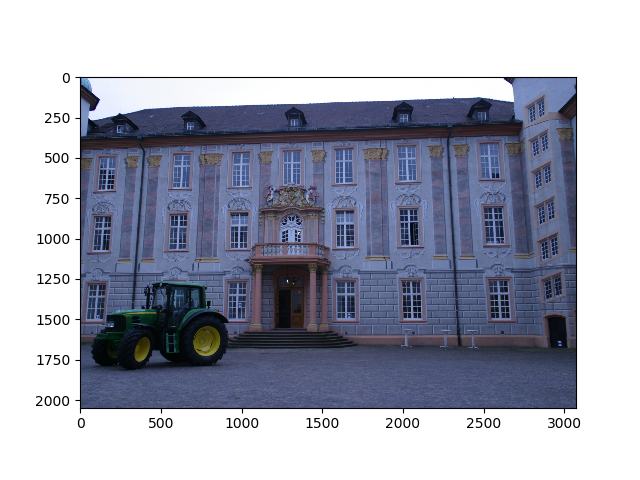

In [ ]:
img3 = cv2.imread('../data/castle-P19/images/0006.jpg')
img3 = img3[:,:,::-1]
surfer=cv2.xfeatures2d.SURF_create()
kp3, desc3 = surfer.detectAndCompute(img3,None)

plt.figure()
plt.imshow(img3)

img3pts,pts3dpts = ut.Find2D3DMatches(desc1,img1idx,desc2,img2idx,desc3,kp3,mask,pts3d)

## 4.1. Perspective-n-Point (PnP) Algorithm

### 4.1.1. Least Squares Solution

In [ ]:
from upenn_sfm_cache import LinearPnP
Rtest,ttest=LinearPnP(pts3dpts,img3pts,K)

### 4.1.2. RANSAC

In [ ]:
retval,Rvec,tnew,mask3gt = cv2.solvePnPRansac(pts3dpts[:,np.newaxis],img3pts[:,np.newaxis],
                                            K,None,confidence=.99,flags=cv2.SOLVEPNP_DLS)
Rnew,_=cv2.Rodrigues(Rvec)

In [ ]:
#Rnew,tnew,mask3=sfmnp.LinearPnPRansac(pts3dpts,img3pts,K,outlierThres=5.0,iters=2000)

In [ ]:
tnew = tnew[:,0]

## 4.2. Visualizations

<IPython.core.display.Javascript object>


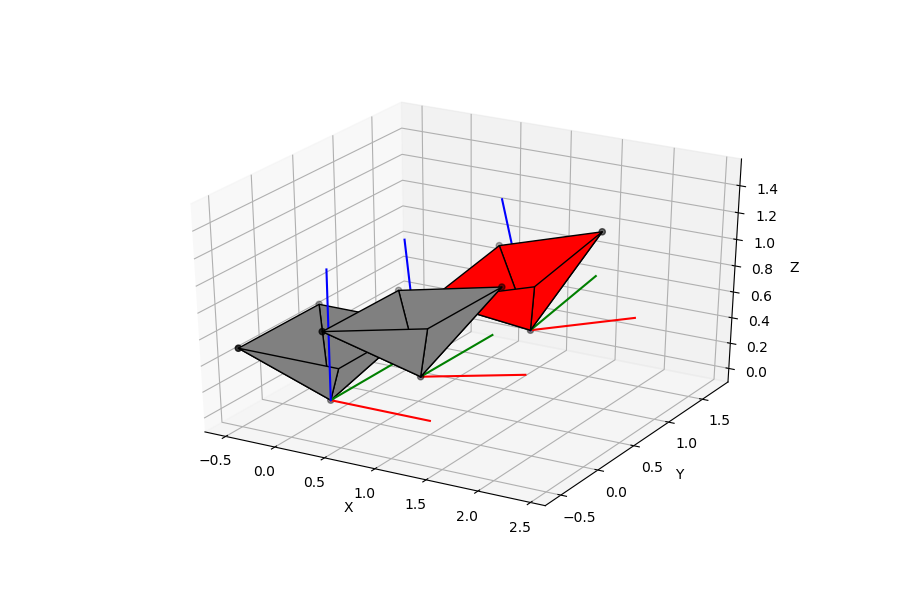

In [ ]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ut.PlotCamera(np.eye(3,3),np.zeros((3,)),ax)
ut.PlotCamera(R,t[:,0],ax)
ut.PlotCamera(Rnew,tnew[:,0],ax,faceColor='red')

# 5. Re-triangulation

In [ ]:
kpNew, descNew = kp3, desc3 

kpOld,descOld = kp1,desc1
ROld, tOld = np.eye(3), np.zeros((3,1))

accPts = []
for (ROld, tOld, kpOld, descOld) in [(np.eye(3),np.zeros((3,1)), kp1,desc1),(R,t,kp2,desc2)]: 
    
    #Matching between old view and newly registered view.. 
    print ('[Info]: Feature Matching..')
    matcher = cv2.BFMatcher(crossCheck=True)
    matches = matcher.match(descOld, desc3)
    matches = sorted(matches, key = lambda x:x.distance)
    imgOldPts, imgNewPts, _, _ = ut.GetAlignedMatches(kpOld,descOld,kpNew,
                                                          descNew,matches)
    
    #Pruning the matches using fundamental matrix..
    print ('[Info]: Pruning the Matches..')
    F,mask=cv2.findFundamentalMat(imgOldPts,imgNewPts,method=cv2.FM_RANSAC,param1=.1,param2=.99)
    mask = mask.flatten().astype(bool)
    imgOldPts=imgOldPts[mask]
    imgNewPts=imgNewPts[mask]
    
    #Triangulating new points
    print ('[Info]: Triangulating..')
    newPts = sfmnp.GetTriangulatedPts(imgOldPts,imgNewPts, K, Rnew,tnew[:,np.newaxis],cv2.triangulatePoints,ROld,tOld)
    
    #Adding newly triangulated points to the collection
    accPts.append(newPts)

[Info]: Feature Matching..
[Info]: Pruning the Matches..
[Info]: Triangulating..
(3, 3) (3, 1) (3, 3) (3, 1)
[Info]: Feature Matching..
[Info]: Pruning the Matches..
[Info]: Triangulating..
(3, 3) (3, 1) (3, 3) (3, 1)


In [ ]:
#Adding the original 2-view-sfm point cloud and saving the whole collection
accPts.append(pts3d)
ut.pts2ply(np.concatenate((accPts),axis=0),'castle_nview.ply')

# 6. Final Result 

<img src="fountain_dense.png">

# Chapter 4. Putting It Together: Part I

# Chapter 5. Bundle Adjustment

# Chapter 6. Putting It Together: Part II